# Bidirectional approach

In [1]:
#import libraries
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
path_to_file = "articles/sample_text.txt"

In [3]:
tokenizer = Tokenizer()

In [4]:
text = open(path_to_file,'rb').read().decode(encoding='utf-8')
print(f'The length of the article is {len(text)}')

The length of the article is 20038


In [5]:
data = text.lower().replace('\xa0\xa0','')

In [6]:
data = text.lower().replace('\xa0','')
data = data.split(".")
#data

In [7]:
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
#print(total_words)

{'the': 1, 'to': 2, 'data': 3, 'and': 4, 'a': 5, 'is': 6, 'of': 7, 'marketing': 8, 'you': 9, 'are': 10, 'your': 11, 'science': 12, 'that': 13, 'in': 14, 'can': 15, 'for': 16, 'on': 17, 'scientist': 18, 'growth': 19, 'this': 20, 'with': 21, 'insights': 22, 'customer': 23, 'as': 24, 'not': 25, 'have': 26, 'their': 27, 'what': 28, 'business': 29, 'customers': 30, 'it': 31, 'at': 32, 'by': 33, 'marketer': 34, 'an': 35, 'analysis': 36, 'how': 37, 'or': 38, 'where': 39, 'model': 40, 'most': 41, 'do': 42, 'they': 43, 'new': 44, 'team': 45, 'likely': 46, 'from': 47, 'clustering': 48, 'product': 49, 'marketers': 50, 'scientists': 51, 'understanding': 52, 'will': 53, 'we': 54, 'then': 55, 'way': 56, 'about': 57, 'people': 58, 'through': 59, 'strategy': 60, 'help': 61, 'like': 62, 'learning': 63, 'one': 64, 'who': 65, 'target': 66, 'give': 67, 'has': 68, 'sentiment': 69, 'brand': 70, 'into': 71, 'machine': 72, 'understand': 73, 'some': 74, 'does': 75, 'while': 76, 'other': 77, 'but': 78, 'buy': 7

In [8]:
print(total_words)

888


In [11]:
input_sequences = []
for line in data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        #print(i)
        n_gram_sequence = token_list[:i+1]
        #print("N_gram: "+ n_gram_sequence)
        input_sequences.append(n_gram_sequence)
#print(input_sequences)
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [12]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=20, verbose=1)

Epoch 1/20
94/94 [==============================] - 7s 79ms/step - loss: 6.3956 - accuracy: 0.0319
Epoch 2/20
94/94 [==============================] - 7s 79ms/step - loss: 5.8418 - accuracy: 0.0429
Epoch 3/20
94/94 [==============================] - 7s 73ms/step - loss: 5.7847 - accuracy: 0.0426
Epoch 4/20
94/94 [==============================] - 7s 70ms/step - loss: 5.7284 - accuracy: 0.0423
Epoch 5/20
94/94 [==============================] - 7s 78ms/step - loss: 5.6693 - accuracy: 0.0433
Epoch 6/20
94/94 [==============================] - 7s 80ms/step - loss: 5.6139 - accuracy: 0.0449
Epoch 7/20
94/94 [==============================] - 7s 76ms/step - loss: 5.5605 - accuracy: 0.0486
Epoch 8/20
94/94 [==============================] - 7s 76ms/step - loss: 5.5109 - accuracy: 0.0509
Epoch 9/20
94/94 [==============================] - 7s 72ms/step - loss: 5.4590 - accuracy: 0.0586
Epoch 10/20
94/94 [==============================] - 7s 73ms/step - loss: 5.4083 - accuracy: 0.0642
Epoch 11/

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

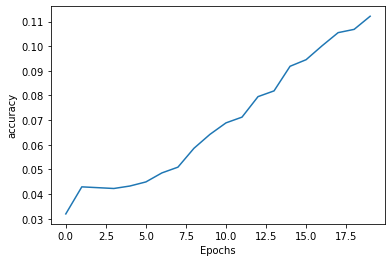

In [14]:
plot_graphs(history, 'accuracy')

In [ ]:

seed_text = "Data science is useful because"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

In [16]:
seed_text = "Data science is useful because"
next_words = 10

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    predicted = model.predict_classes(token_list,verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
#print(seed_text)